### Image Classification with Convolutional Neural Networks

A CNN begins with one or more sets of convolution layers (CL) and pooling layers (PL)

- Convolution layers extract features from images, generating transformed images that are commonly referred to as feature maps because they highlight distinguishing features such as shapes and contours

- Pooling layers reduce the feature maps' size by half so that the features can be extracted at various resolutions and are less sensitive to small changes in position.

- The CP and LP are called bottleneck layers since they reduce the dimensionality of images input to them.

- Bottleneck layers transform matrices of integer pixel values into tensors of floating-point numbers that better characterize the images input to them

- NPL networks use word embeddings to create **dense vector representations** (DVR) of the words in a document. DVRs are arrays of floating point numbers that do ore to characterize the input than the input data itself

- Conv2D() anatomy
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))
        - first_param: number of Convolution Kernels to include in the layer, i.e 32. More kernel, more fitting power
        - second_param: specifies the dimensions of each kernel
        - input_shape: specifies the size of the images input to the CNN

In [9]:
# for Mac OS Sillicon
# pip install tensorflow
# pip install tensorflow-macos
# # pip install tensorflow-metal

### Lets train a CNN to recognize digits in the MNIST dataset

In [10]:
from tensorflow.keras.datasets import mnist

(train_images, y_train), (test_images, y_test) = mnist.load_data()
x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255

In [11]:
# lets define a CNN that accepts 28 x 28 x 1 arrays of pixel values as input, contains 2 pairs of CL and PLs, and has a softmax output layer with 10 neurons.

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

2025-11-09 14:59:55.292020: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-11-09 14:59:55.292077: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-09 14:59:55.292085: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-11-09 14:59:55.292142: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-09 14:59:55.292169: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                   │ (None, 26, 26, 32)       │           320 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)      │ (None, 13, 13, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)                 │ (None, 11, 11, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)    │ (None, 5, 5, 64)         │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten (Flatten)                 │ (None, 1600)             │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 128)              │       204,928 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 10)               │         1,290 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-11-09 14:59:56.225360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9536 - loss: 0.1532 - val_accuracy: 0.9818 - val_loss: 0.0571
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9822 - loss: 0.0618 - val_accuracy: 0.9870 - val_loss: 0.0423
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9848 - loss: 0.0535 - val_accuracy: 0.9875 - val_loss: 0.0510
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9847 - loss: 0.0684 - val_accuracy: 0.9842 - val_loss: 0.0811
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9832 - loss: 0.1317 - val_accuracy: 0.9791 - val_loss: 0.1979
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9815 - loss: 0.2959 - val_accuracy: 0.9814 - val_loss: 0.4351
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9819 - loss: 0.5547 - val_accuracy: 0.9757 - val_loss: 1.0757
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9801 - loss: 1.15

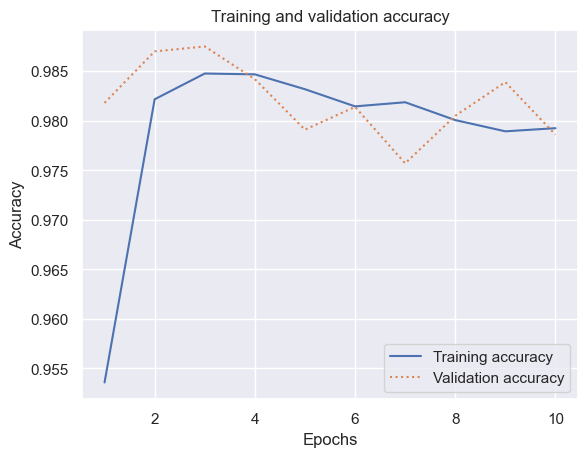

In [12]:
# lets train the network and plot the training and validation accuracy
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc, ':', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')